## LoveDa Dataset Exploration and Visualization

### 1. Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

### 2. Explore the `dist` Folder Structure

In [25]:
def walk_and_visualize(root_dir):
    for subdir, dirs, files in os.walk(root_dir):
        print(f"Current folder: {subdir}")
        for file in files:
            file_path = os.path.join(subdir, file)
            print(f"  File: {file_path}")



In [28]:
walk_and_visualize("./dist")

Current folder: ./dist
  File: ./dist/.DS_Store
  File: ./dist/val.zip
  File: ./dist/test.zip
  File: ./dist/train.zip
Current folder: ./dist/test
Current folder: ./dist/test/Urban
Current folder: ./dist/test/Urban/images_png
  File: ./dist/test/Urban/images_png/5486.png
  File: ./dist/test/Urban/images_png/5492.png
  File: ./dist/test/Urban/images_png/5479.png
  File: ./dist/test/Urban/images_png/5323.png
  File: ./dist/test/Urban/images_png/5445.png
  File: ./dist/test/Urban/images_png/5451.png
  File: ./dist/test/Urban/images_png/5337.png
  File: ./dist/test/Urban/images_png/5860.png
  File: ./dist/test/Urban/images_png/5874.png
  File: ./dist/test/Urban/images_png/5684.png
  File: ./dist/test/Urban/images_png/5690.png
  File: ./dist/test/Urban/images_png/5848.png
  File: ./dist/test/Urban/images_png/5647.png
  File: ./dist/test/Urban/images_png/5653.png
  File: ./dist/test/Urban/images_png/5914.png
  File: ./dist/test/Urban/images_png/5900.png
  File: ./dist/test/Urban/images_png/

### 3. Get the Label Size for Every Data Split  
*Note: Always check if the file is an image before counting.*


In [ ]:
import os

image_extensions = {'.jpg', '.jpeg', '.png', '.tif', '.tiff', '.bmp'}
sizes = {}

for subdir, dirs, files in os.walk("./dist"):
    image_files = [f for f in files if os.path.splitext(f)[1].lower() in image_extensions]
    if len(image_files) > 0:
        print(f"Folder: {subdir} - Number of images: {len(image_files)}")
        parts = subdir.split(os.sep)
        
        if len(parts) >= 4:
            split = parts[2] 
            label = parts[3]  

            if split not in sizes:
                sizes[split] = {}
            sizes[split][label] = len(image_files)



Folder: ./dist/test/Urban/images_png - Number of images: 820
Folder: ./dist/test/Rural/images_png - Number of images: 976
Folder: ./dist/train/Urban/images_png - Number of images: 1156
Folder: ./dist/train/Urban/masks_png - Number of images: 1156
Folder: ./dist/train/Rural/images_png - Number of images: 1366
Folder: ./dist/train/Rural/masks_png - Number of images: 1366
Folder: ./dist/val/Urban/images_png - Number of images: 677
Folder: ./dist/val/Urban/masks_png - Number of images: 677
Folder: ./dist/val/Rural/images_png - Number of images: 992
Folder: ./dist/val/Rural/masks_png - Number of images: 992


In [44]:
sizes

{'test': {'Urban': 820, 'Rural': 976},
 'train': {'Urban': 1156, 'Rural': 1366},
 'val': {'Urban': 677, 'Rural': 992}}

### 4. Visualizing Image Counts by Data Split and Label

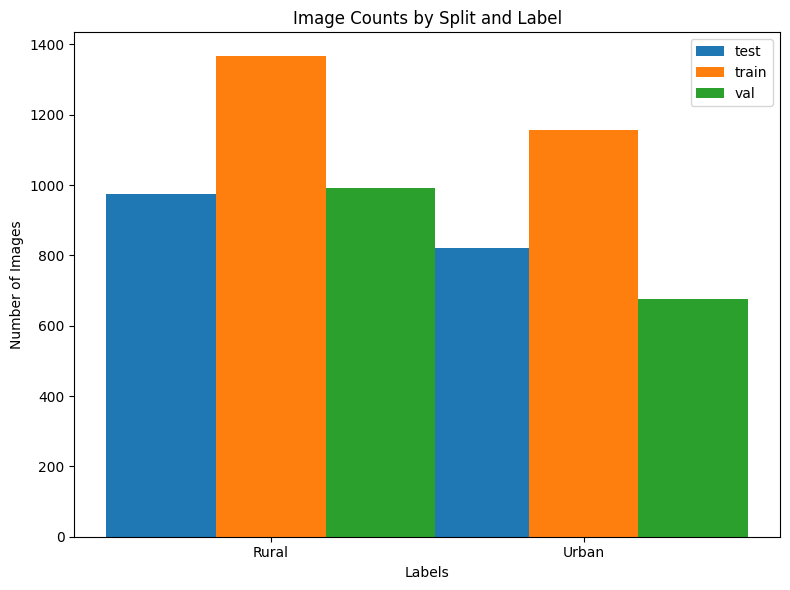

In [45]:
splits = list(sizes.keys())
labels = set()
for split in splits:
    labels.update(sizes[split].keys())
labels = sorted(labels)

bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))

for i, split in enumerate(splits):
    counts = [sizes[split].get(label, 0) for label in labels]
    ax.bar(index + i * bar_width, counts, bar_width, label=split)

ax.set_xlabel('Labels')
ax.set_ylabel('Number of Images')
ax.set_title('Image Counts by Split and Label')
ax.set_xticks(index + bar_width * (len(splits) - 1) / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


### 5. Visualize a Random Image and Its Mask from a Data Split


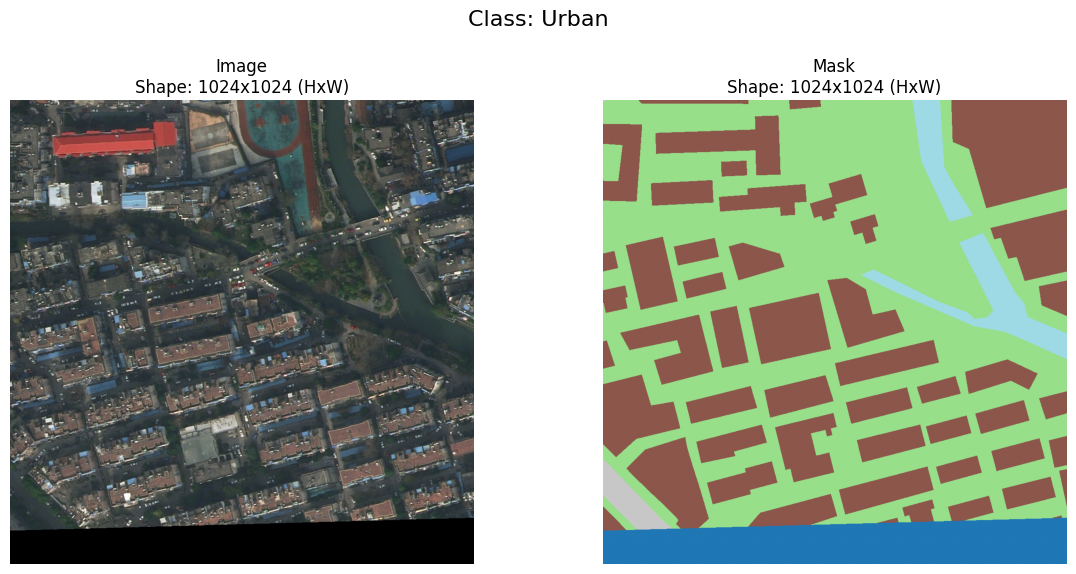

In [74]:
def analyze_random_image(datasplit="train", sizes=None):
    base_path = os.path.join("./dist", datasplit)

    classes = ["Rural", "Urban"]
    label = random.choice(classes)
    class_path = os.path.join(base_path, label, "images_png")

    image_extensions = {'.jpg', '.jpeg', '.png', '.tif', '.tiff', '.bmp'}
    all_images = [f for f in os.listdir(class_path)
                  if os.path.splitext(f)[1].lower() in image_extensions]

    if not all_images:
        print(f"No images found in {class_path}")
        return

    random_image_name = random.choice(all_images)
    image_path = os.path.join(class_path, random_image_name)

    mask_path = image_path.replace("images_png", "masks_png")

    image = Image.open(image_path)
    mask = Image.open(mask_path)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Class: {label}", fontsize=16)

    axes[0].imshow(image)
    axes[0].set_title(f"Image\nShape: {image.size[1]}x{image.size[0]} (HxW)")
    axes[0].axis('off')

    axes[1].imshow(mask, cmap='tab20')
    axes[1].set_title(f"Mask\nShape: {mask.size[1]}x{mask.size[0]} (HxW)")
    axes[1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

analyze_random_image(datasplit="train", sizes=sizes)
